## TALLER - NUBE DE PALABRAS

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
import re

In [2]:
libro = pd.read_csv('1984.csv',encoding='utf-8')
libro.head()

,1984,libro
0,"""Era un día luminoso y frío de abril y los rel...",1984
1,"""barbilla clavada en el pecho en su esfuerzo p...",1984
2,"""rápidamente por entre las puertas de cristal ...",1984
3,"""suficiente rapidez para evitar que una ráfaga...",1984
4,"""El vestíbulo olía a legumbres cocidas y a est...",1984


In [3]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

libro['pp'] = libro['1984'].apply(lambda texto: pre_procesado(texto))

libro.head()

,1984,libro,pp
0,"""Era un día luminoso y frío de abril y los rel...",1984,día luminoso frío abril relojes daban trece wi...
1,"""barbilla clavada en el pecho en su esfuerzo p...",1984,barbilla clavada pecho esfuerzo burlar molestí...
2,"""rápidamente por entre las puertas de cristal ...",1984,rápidamente puertas cristal casas victoria aunque
3,"""suficiente rapidez para evitar que una ráfaga...",1984,suficiente rapidez evitar ráfaga polvorienta c...
4,"""El vestíbulo olía a legumbres cocidas y a est...",1984,vestíbulo olía legumbres cocidas esteras vieja...


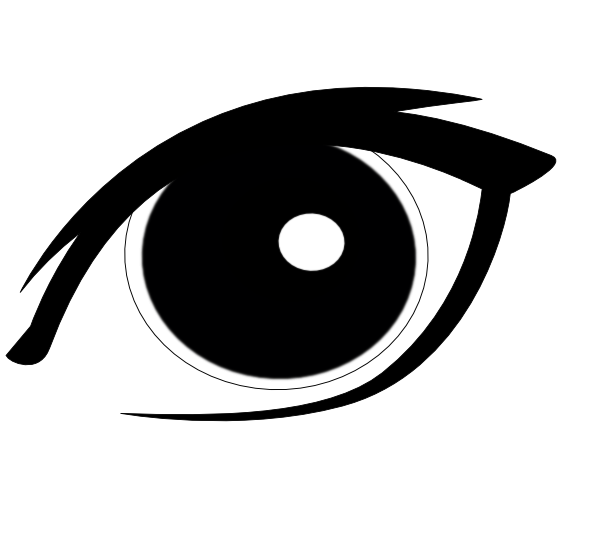

In [4]:
ojo = PIL.Image.open("ojo.png")
display(ojo)

In [5]:
mask = np.array(ojo)
mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [6]:
palabras = libro.pp.str.cat(sep=' ')

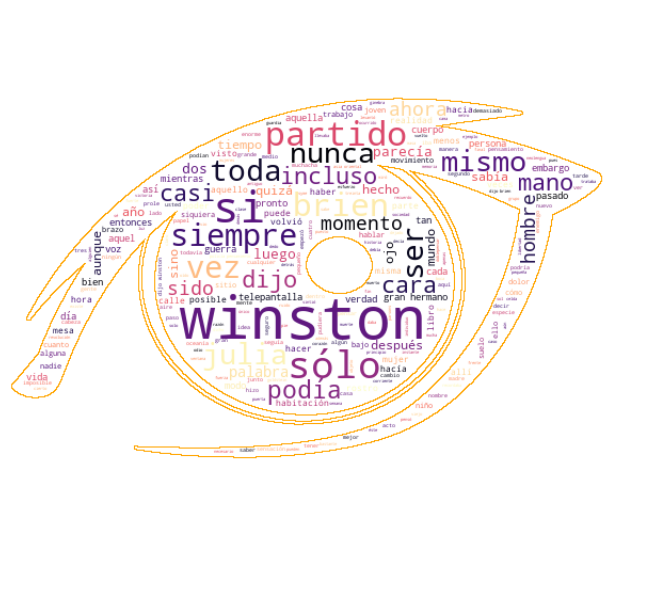

In [7]:
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='magma',
                     stopwords=stopwords_sp,
                     mask=mask, contour_width=0.5, contour_color='orange').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
#wordcloud.to_file("ojo.png")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()